# EdgeDetection And HoleFilling
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Digital Image Processing Course

In [48]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Boundry Extraction

In [49]:
def BoundryExtraction(img):
    kernel = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]], dtype=np.uint8)
    erosion = cv2.erode(img, kernel, iterations=1)
    dilation = cv2.dilate(img, kernel, iterations=1)
    beta = img - erosion
    alpha = dilation - img
    gamma = dilation - erosion

    plt.figure(figsize=(10, 7))
    plt.subplot(231), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(232), plt.imshow(erosion, cmap='gray'), plt.title('Erosion')
    plt.subplot(233), plt.imshow(beta, cmap='gray'), plt.title('BoundryExtraction (img - erosion)')
    plt.subplot(234), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(235), plt.imshow(dilation, cmap='gray'), plt.title('Dilation')
    plt.subplot(236), plt.imshow(alpha, cmap='gray'), plt.title('BoundryExtraction (dilation - img)')
    plt.show()

    plt.imshow(gamma, cmap='gray'), plt.title('BoundryExtraction (dilation - erosion)')
    plt.show()

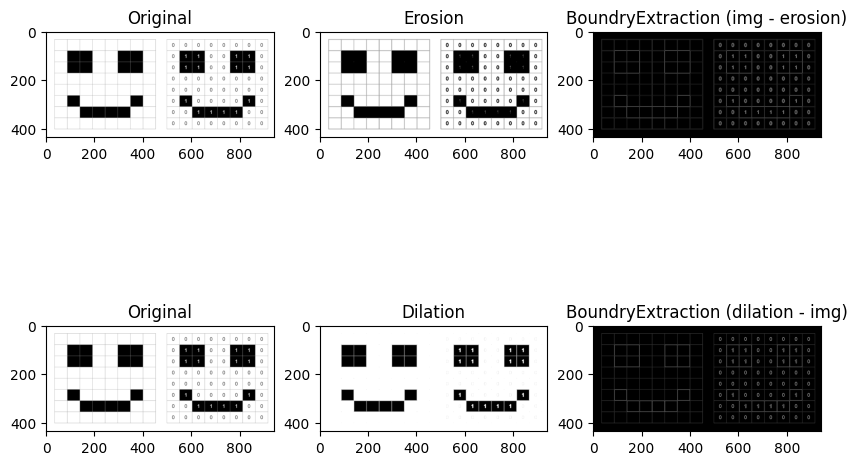

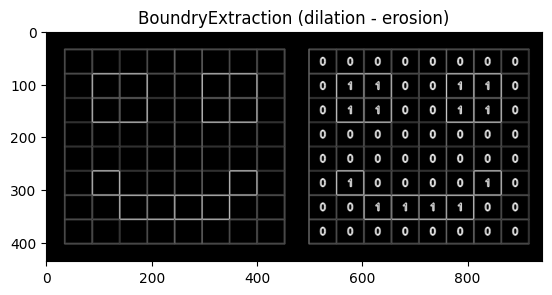

In [50]:
img1_binary = cv2.imread('Images/img1bin.png', 0)
BoundryExtraction(img1_binary)

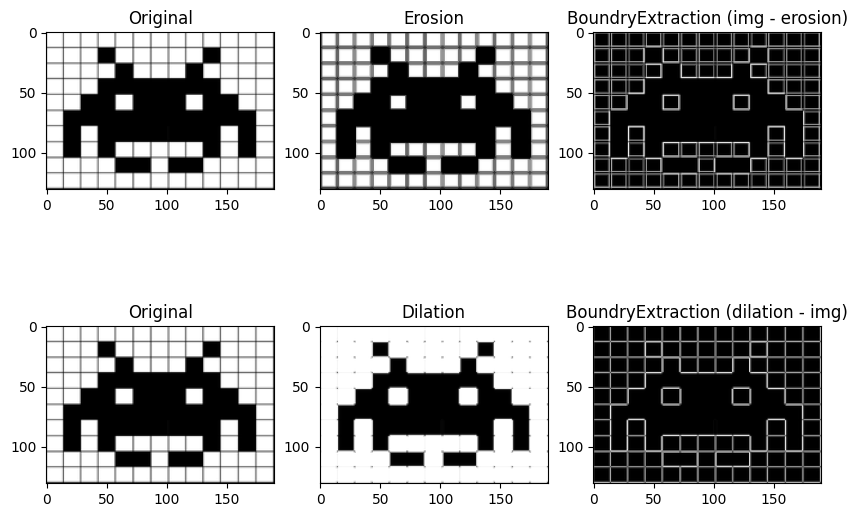

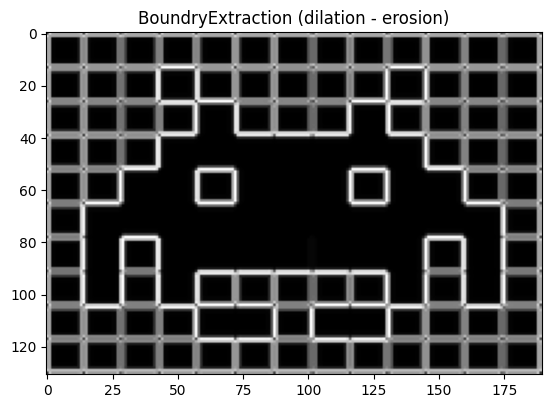

In [51]:
img2_binary = cv2.imread('Images/img2bin.png', 0)
BoundryExtraction(img2_binary)

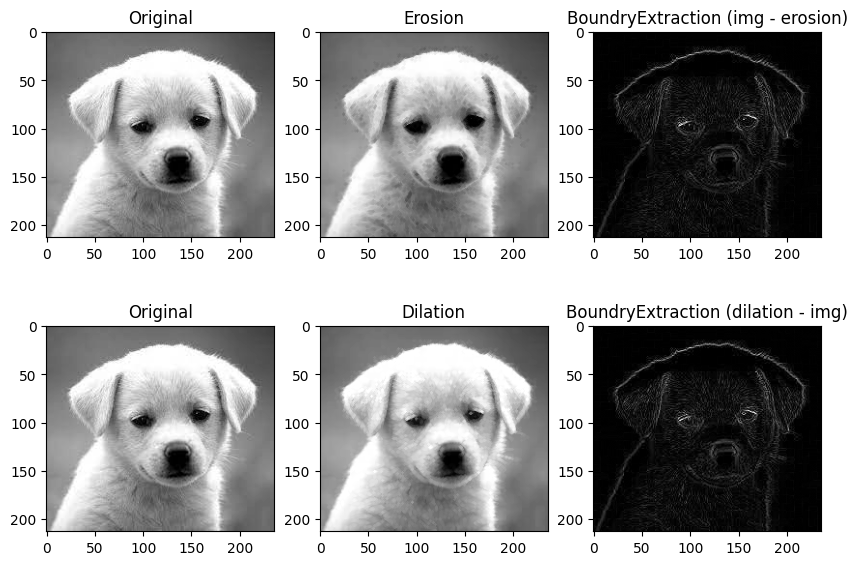

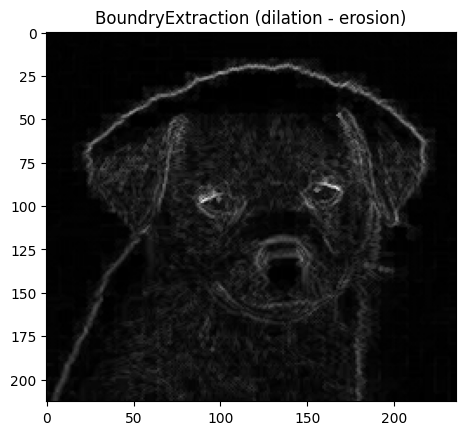

In [52]:
img1_gray = cv2.imread('Images/img1gray.jpeg', 0)
BoundryExtraction(img1_gray)

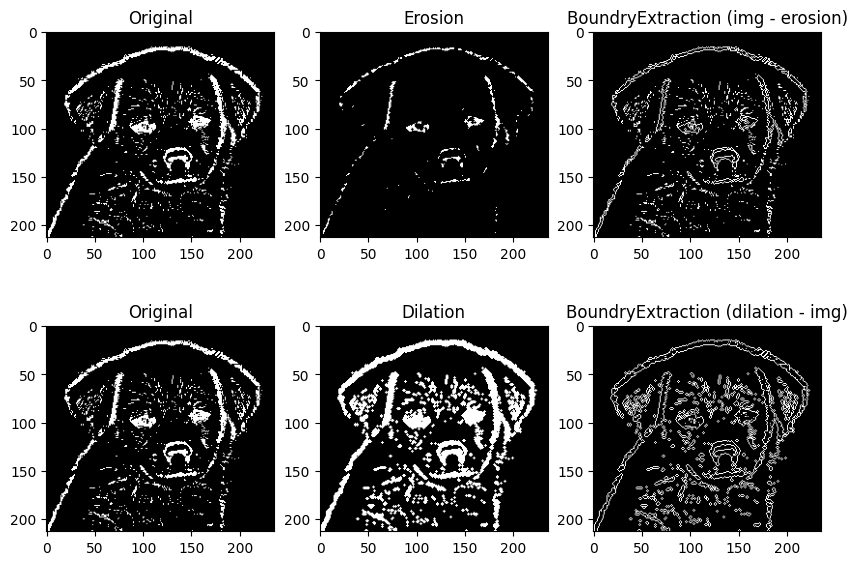

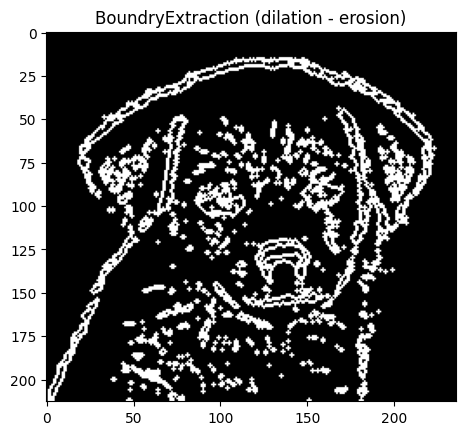

In [53]:
img1_bin = cv2.adaptiveThreshold(img1_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 15)
BoundryExtraction(img1_bin)

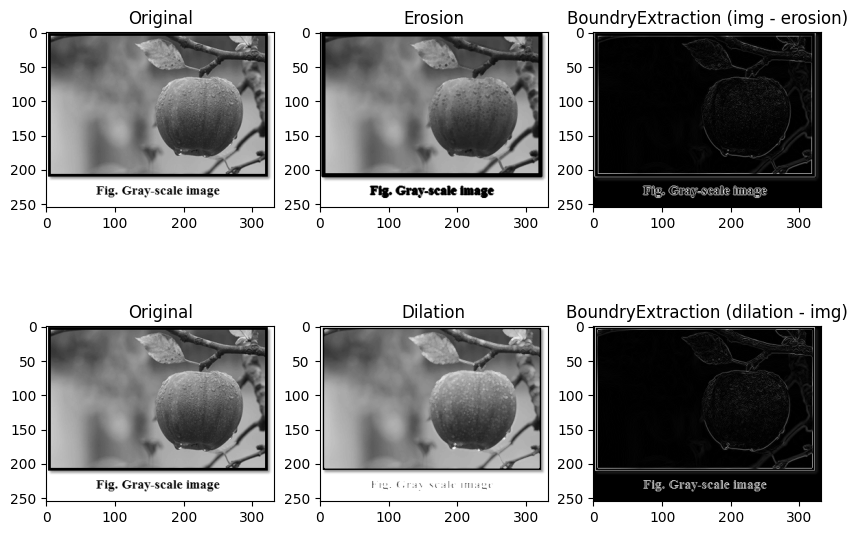

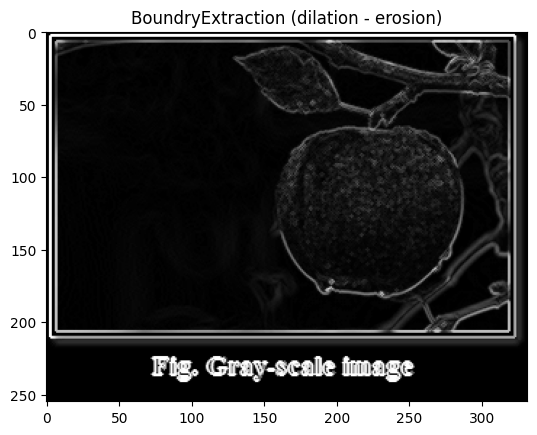

In [54]:
img2_gray = cv2.imread('Images/img2gray.png', 0)
BoundryExtraction(img2_gray)

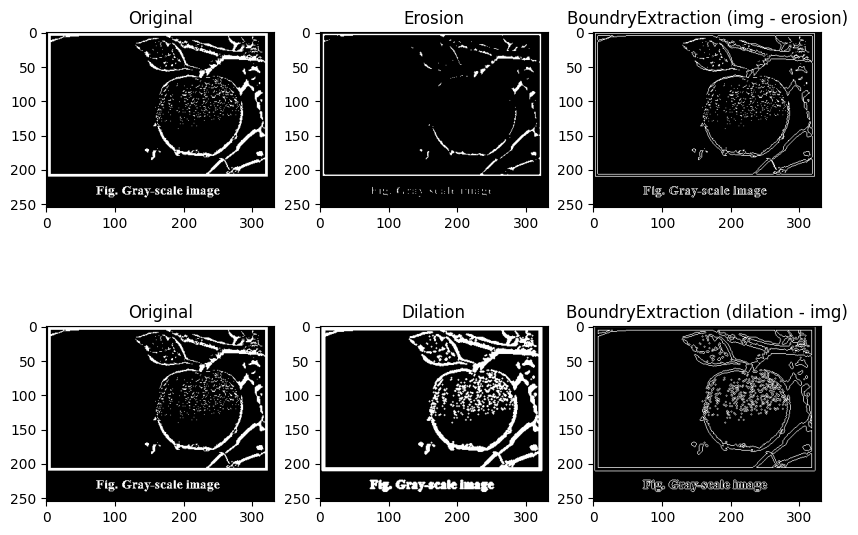

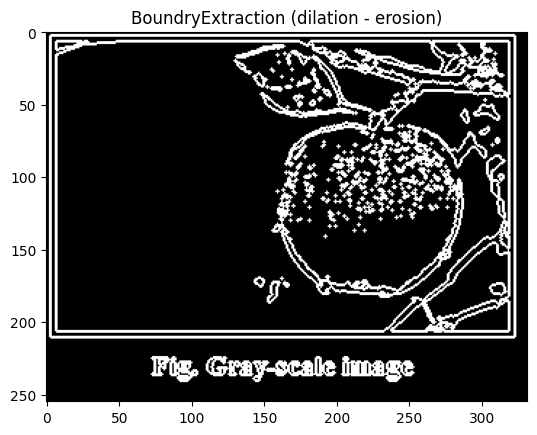

In [55]:
img2_bin = cv2.adaptiveThreshold(img2_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 15)
BoundryExtraction(img2_bin)

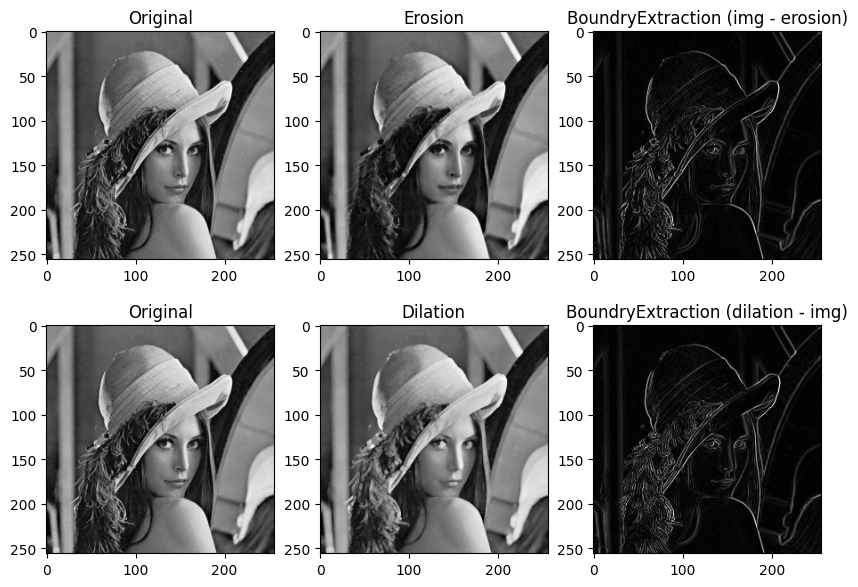

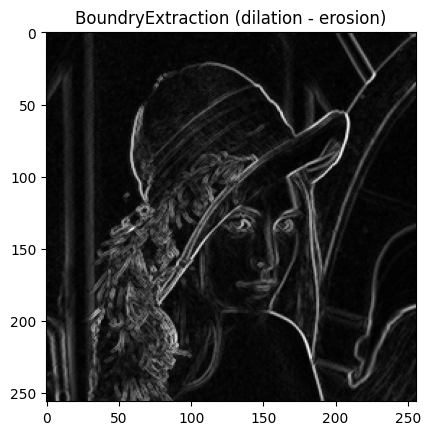

In [77]:
lena = cv2.imread('Images/lena.tif', 0)
BoundryExtraction(lena)

In [82]:
def LOG_Filter(img):
    blured_img = cv2.GaussianBlur(lena, (5, 5), 0)
    laplacian = cv2.Laplacian(blur, cv2.CV_64F)

    laplacian = cv2.normalize(laplacian, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    _, edges = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

    plt.imshow(edges, cmap='gray'), plt.title('Edge - LOG Filter')
    plt.show()

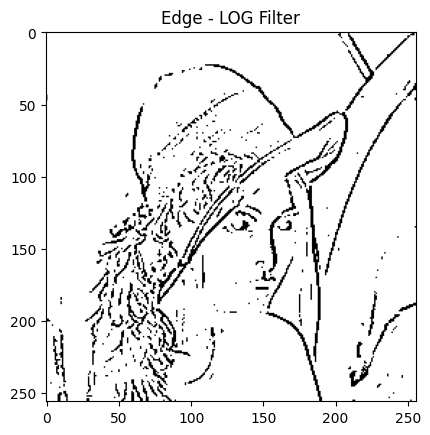

In [83]:
LOG_Filter(lena)

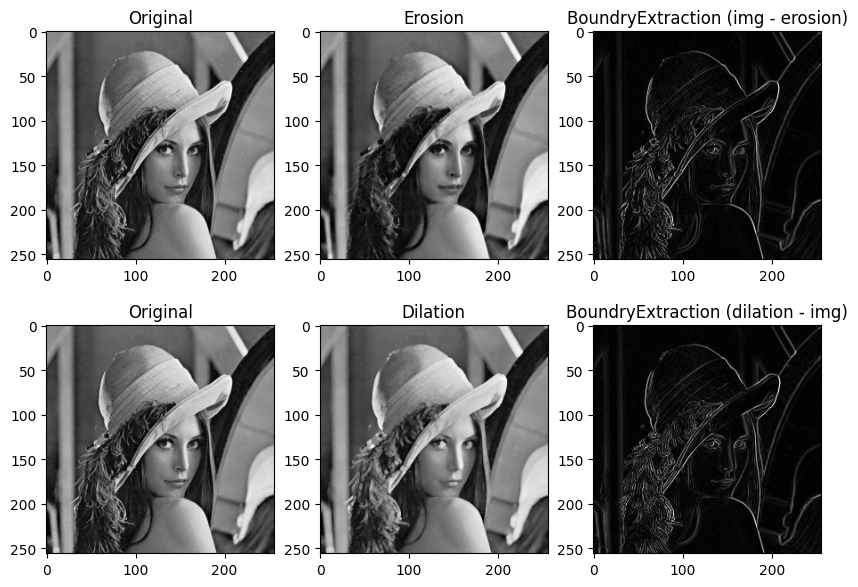

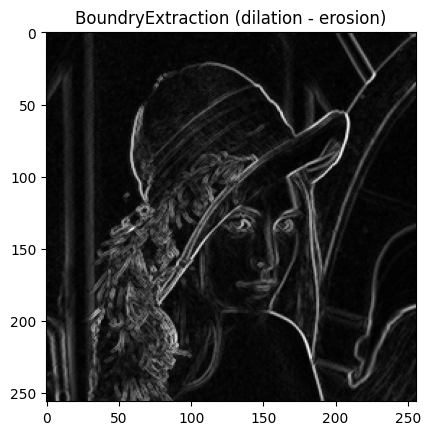

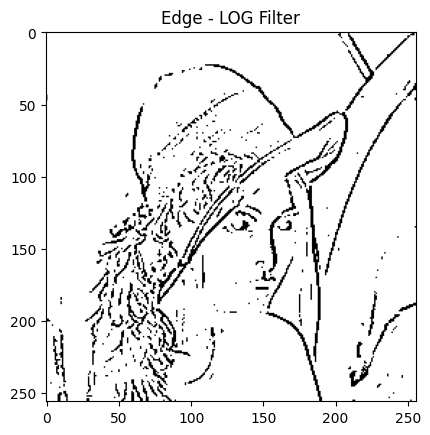

In [84]:
# Compare of BoundryExtraction and LOG_Filter
BoundryExtraction(lena)
LOG_Filter(lena)

### Hole Filling

In [73]:
def HoleFilling(img):
    _, img_thresh = cv2.threshold(img, 220, 255, cv2.THRESH_BINARY_INV)
    img_floodfill = img_thresh.copy()
    
    height, width = img_thresh.shape[:2]
    mask = np.zeros((height+2, width+2), np.uint8)
    
    cv2.floodFill(img_floodfill, mask, (0,0), 255)
    img_floodfill_inverse = cv2.bitwise_not(img_floodfill)
    
    result = img_floodfill_inverse | img_thresh

    plt.subplot(221), plt.imshow(img, cmap='gray'), plt.title('Orignial')
    plt.subplot(222), plt.imshow(img_thresh, cmap='gray'), plt.title('Threshold Image')
    plt.subplot(223), plt.imshow(img_floodfill, cmap='gray'), plt.title('FloodFill Image')
    plt.subplot(224), plt.imshow(img_floodfill_inverse, cmap='gray'), plt.title('FloodFill Inverse Image')
    plt.show()
    plt.imshow(result, cmap='gray'), plt.title('Result')
    plt.show()

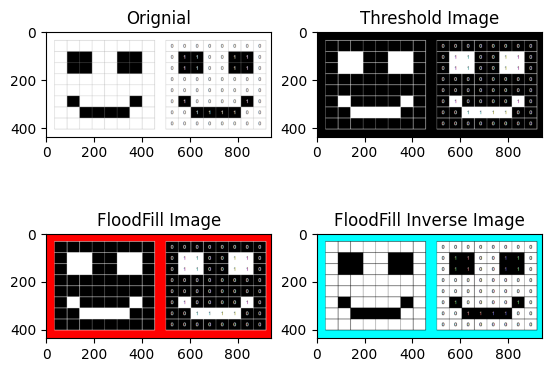

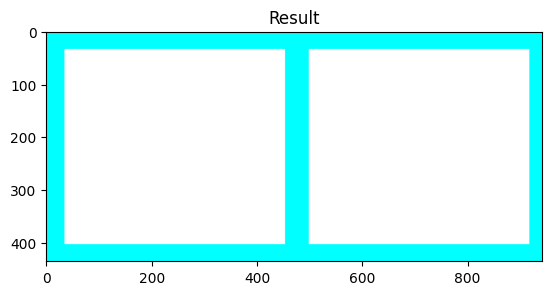

In [74]:
img1_bin = cv2.imread('Images/img1bin.png')
HoleFilling(img1_bin)

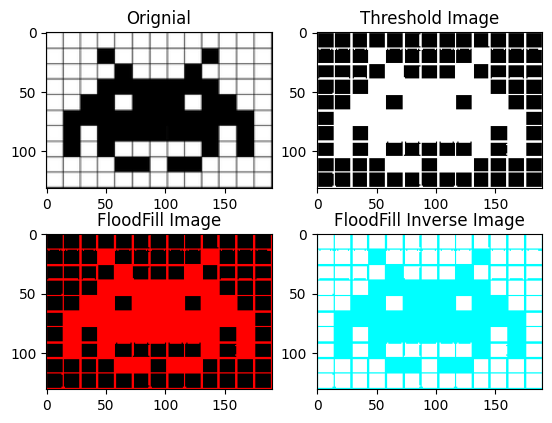

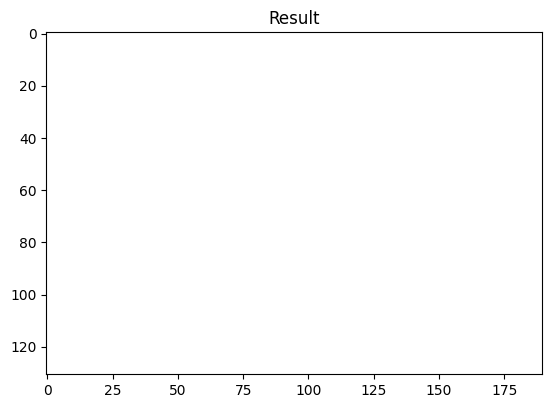

In [75]:
img2_bin = cv2.imread('Images/img2bin.png')
HoleFilling(img2_bin)

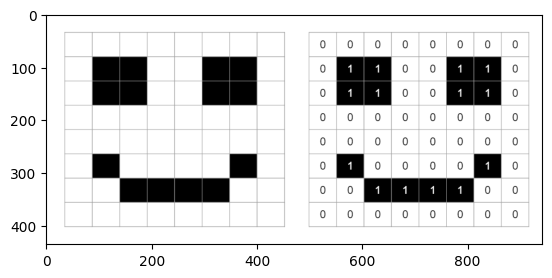

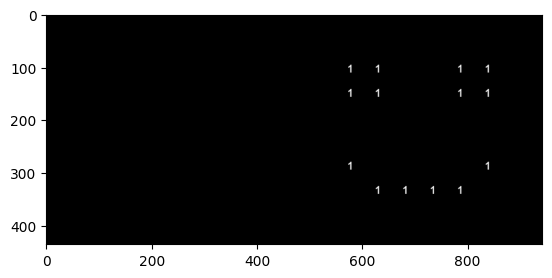

In [72]:
# Load the grayscale image
img = cv2.imread('Images/img1bin.png', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary mask
ret, mask = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV)

# Copy the mask to create a floodfill mask
floodfill_mask = mask.copy()

# Specify the seed point for floodfilling
h, w = img.shape[:2]
seed_point = (w//2, h//2)

# Perform floodfilling on the mask
cv2.floodFill(floodfill_mask, None, seed_point, 255)

# Invert the floodfill mask
floodfill_mask_inv = cv2.bitwise_not(floodfill_mask)

# Combine the binary mask and the floodfill mask to get the final mask
filled_mask = mask | floodfill_mask_inv

# Apply the mask to the original image
result = cv2.bitwise_and(img, img, mask=filled_mask)

# Show the input and output images side by side
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(result, cmap='gray')
plt.show()

In [86]:
def hole_filling_grayscale(img):
    _, mask = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY_INV)
    kernel = np.ones((5,5),np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    result = cv2.inpaint(img, mask, 3, cv2.INPAINT_TELEA)

    plt.subplot(121), plt.imshow(img, cmap='gray'), plt.title('Original')
    plt.subplot(122), plt.imshow(result, cmap='gray'), plt.title('Result')
    plt.show()

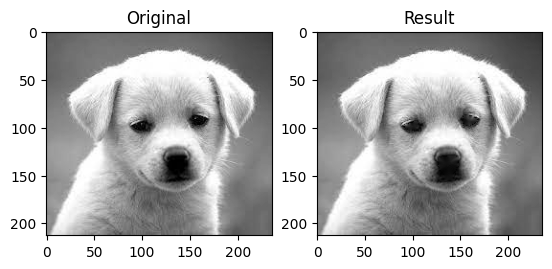

In [88]:
img1_gray = cv2.imread('Images/img1gray.jpeg', 0)
hole_filling_grayscale(img1_gray)

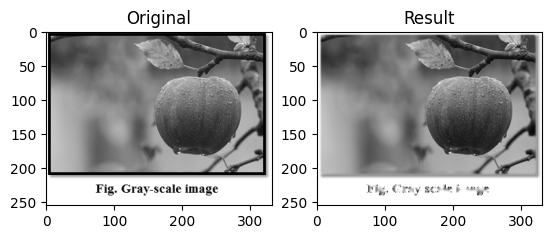

In [89]:
img2_gray = cv2.imread('Images/img2gray.png', 0)
hole_filling_grayscale(img2_gray)